In [ ]:
from google.colab import drive
drive.mount('./mount')

Mounted at ./mount


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Model import

In [ ]:
pd.set_option('display.max_columns', None)
d_reg_test = pd.read_csv('/home/sbml/BADA/reg_test_data.csv')
d_clf_test = pd.read_csv('/home/sbml/BADA/clf_test_data.csv')

In [ ]:
features = d_reg_test.columns[1:-1]

In [ ]:
X_reg = d_reg_test[features].values
y_reg = d_reg_test[['soh']].values

X_clf = d_clf_test[features].values
y_clf = d_clf_test[['label']].values

In [ ]:
reg_model = tf.keras.models.load_model('/home/sbml/BADA/model/reg_model.keras')
clf_model = tf.keras.models.load_model('/home/sbml/BADA/model/clf_model.keras')

In [ ]:
reg_pred, reg_att = reg_model.predict(X_reg)
clf_pred, clf_att = clf_model.predict(X_clf)

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 275ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step


In [ ]:
reg_att = np.array(reg_att)
clf_att = np.array(clf_att)
print(reg_att.shape)
print(clf_att.shape)

(4, 254, 8, 62, 62)
(4, 678, 8, 62, 62)


# Attention weights analysis

## 0. test data with the best performance

In [ ]:
gap = np.abs(reg_pred - y_reg)
np.where(gap==np.min(gap))

(array([123]), array([0]))

In [ ]:
mean_reg_att = np.mean(reg_att, axis=1)
best_reg_att = reg_att[:,123,:,:,:]
mean_reg_att.shape, best_reg_att.shape

((4, 8, 62, 62), (4, 8, 62, 62))

In [ ]:
gap = np.abs(0.5-clf_pred)
np.where(gap==np.max(gap))[0]

array([  0,   1,   2,   3,   4,   6,   7,   9,  10,  11,  13,  15,  18,
        19,  20,  21,  22,  25,  26,  28,  29,  30,  32,  33,  34,  35,
        36,  37,  38,  39,  42,  44,  45,  46,  47,  48,  50,  51,  52,
        53,  55,  56,  57,  59,  60,  61,  62,  63,  64,  66,  67,  70,
        72,  74,  76,  77,  78,  79,  80,  82,  83,  85,  87,  89,  90,
        92,  94,  95,  96,  97, 101, 102, 103, 104, 105, 106, 107, 108,
       109, 110, 111, 112, 113, 115, 116, 117, 118, 119, 120, 121, 122,
       123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 134, 137, 138,
       140, 141, 142, 143, 145, 146, 147, 149, 150, 151, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 167, 168, 169,
       171, 173, 174, 177, 179, 180, 181, 183, 184, 186, 187, 189, 190,
       191, 192, 193, 195, 198, 200, 202, 203, 204, 205, 208, 209, 211,
       213, 215, 217, 218, 219, 222, 223, 225, 226, 228, 230, 231, 232,
       233, 234, 236, 238, 240, 241, 242, 243, 244, 245, 246, 24

In [ ]:
mean_clf_att = np.mean(clf_att, axis=1)
best_clf_att = clf_att[:,330,:,:,:]
mean_clf_att.shape, best_clf_att.shape

((4, 8, 62, 62), (4, 8, 62, 62))

## 1. attention weights analysis

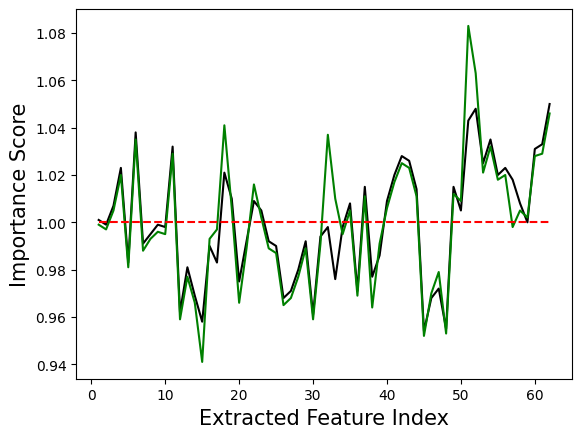

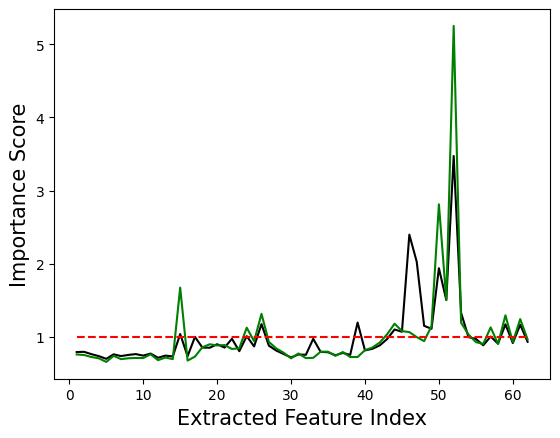

In [ ]:
mean_att_l = [mean_reg_att, mean_clf_att]
best_att_l = [best_reg_att, best_clf_att]
best_att_sum_l = []
for mean_att, best_att in zip(mean_att_l, best_att_l):
  mean_att_sum = np.sum(np.mean(mean_att, axis=(0,1)), axis=0)
  best_att_sum = np.sum(np.mean(best_att, axis=(0,1)), axis=0)
  best_att_sum_l.append(best_att_sum)
  th = np.round(np.mean(mean_att_sum))
  n = range(1,len(mean_att_sum)+1)

  plt.plot(n,np.round(mean_att_sum,3), color='k')
  plt.plot(n,np.round(best_att_sum,3), color='g')
  plt.plot(n,[th]*len(n),'r--')

  plt.xlabel('Extracted Feature Index', size=15)
  plt.ylabel('Importance Score', size=15)
  plt.show()

Text(0, 0.5, 'Vector Magnitude')

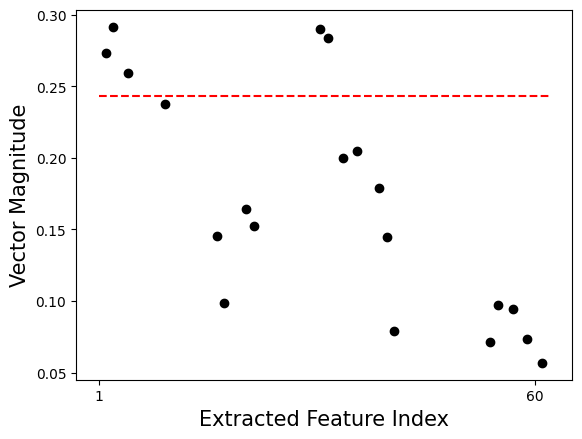

In [ ]:
attw_soh = best_att_sum_l[0]
attw_confi = best_att_sum_l[1]

n = range(1, len(attw_soh)+1)
dist = np.sqrt(np.square(1-attw_soh[idx]) + np.square(1-attw_confi[idx]))
th = np.percentile(dist,75)

plt.scatter(idx, dist, c='k')
plt.plot(n, [th]*len(n),'r--')
plt.xticks([1, 60])
plt.xlabel('Extracted Feature Index', size=15)
plt.ylabel('Vector Magnitude', size=15)

In [ ]:
slc_ft = features[slc_idx]
len(slc_ft), slc_ft

(5,
 Index(['dis_v_end', 'dis_v_area', 'dis_v_std', 'v_skew', 'v_kurtosis'], dtype='object'))

# Selected Health Indicators (HIs)

In [ ]:
d_cell = pd.read_csv('/home/sbml/BADA/cells_features.csv')
d_module = pd.read_csv('/home/sbml/BADA/7p_features.csv')


cell = d_cell[features].values
module = d_module[features].values

c_soh = d_cell[['soh']].values
m_soh = d_module[['soh']].values

c_label = np.array([0]*len(cell))
m_label = np.array([1]*len(module))

In [ ]:
X = np.vstack([cell, module])
soh = np.vstack([c_soh, m_soh])
label = np.hstack([c_label, m_label]).reshape(-1,1)
full = np.hstack([X, soh, label])

In [ ]:
cols = list(features) + ['soh'] + ['label']

In [ ]:
d_origin = pd.DataFrame(full, columns=cols)

In [ ]:
df = d_origin[list(slc_ft)+['soh', 'label']]
len(df)

(3388,)

In [ ]:
df

,dis_v_end,dis_v_area,dis_v_std,v_skew,v_kurtosis,soh,label
0,2660.775,514168.328,295.934427,-0.814268,-0.204203,1.000000,0.0
1,2651.491,514128.383,296.537413,-0.815245,-0.200907,0.999697,0.0
2,2619.535,513993.287,298.683635,-0.818640,-0.191969,0.998568,0.0
3,2616.377,514023.976,299.127323,-0.820888,-0.187078,0.998506,0.0
4,2615.532,513939.274,299.260524,-0.820562,-0.184386,0.998526,0.0
...,...,...,...,...,...,...,...
3383,2514.040,331133.874,295.259824,-2.765994,9.783675,0.715337,1.0
3384,2509.240,331057.319,295.656775,-2.756833,9.721746,0.714892,1.0
3385,2508.669,331050.264,295.655507,-2.770549,9.824282,0.714828,1.0
3386,2504.282,330953.168,296.014470,-2.762467,9.768705,0.714432,1.0


In [ ]:
df.to_csv('/home/sbml/BADA/selected_HIs.csv', index=False)